# 04 Pandas Basic plotting

Pandas support fast plots by wrapping matplotlib into a basic `plot` function exposed on DataFrame and Series.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Optionally adjuest the display format.
pd.set_option('display.float_format', lambda x: '%.3f' % x)

%matplotlib inline

In [2]:
np.random.seed(0)

## Random data

Matplotlib implements many plot types, and Pandas reuses most of these types:

        ‘line’ : line plot (default)
        ‘bar’ : vertical bar plot
        ‘barh’ : horizontal bar plot
        ‘hist’ : histogram
        ‘box’ : boxplot
        ‘kde’ : Kernel Density Estimation plot
        ‘density’ : same as ‘kde’
        ‘area’ : area plot
        ‘pie’ : pie plot
        ‘scatter’ : scatter plot
        ‘hexbin’ : hexbin plot

In [3]:
data = np.random.randn(20, 3)

In [4]:
df = pd.DataFrame(data)

<AxesSubplot:>

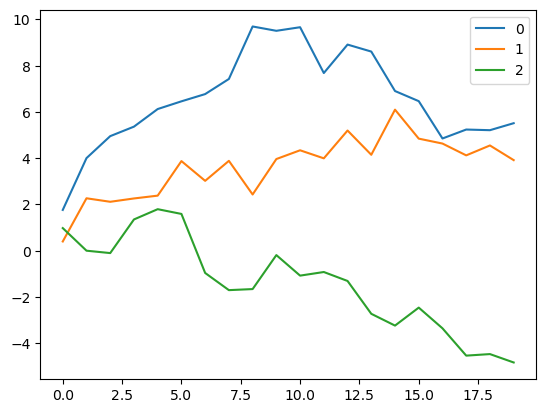

In [5]:
df.cumsum().plot()

Adjusting the plot, e.g. adding a grid or changing the figure size.

<AxesSubplot:>

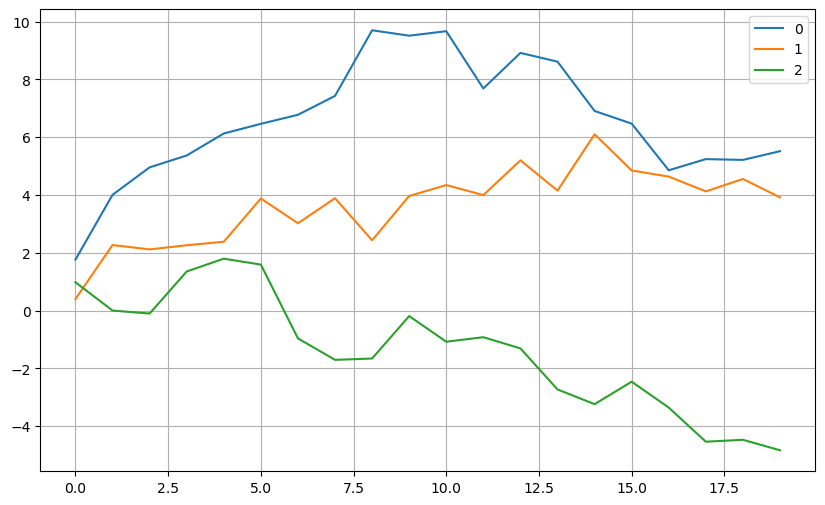

In [6]:
df.cumsum().plot(grid=True, figsize=(10, 6))

If we set the column names of the data frame, the names will be used for the legend.

In [7]:
df.columns = ["A", "B", "C"]

<AxesSubplot:>

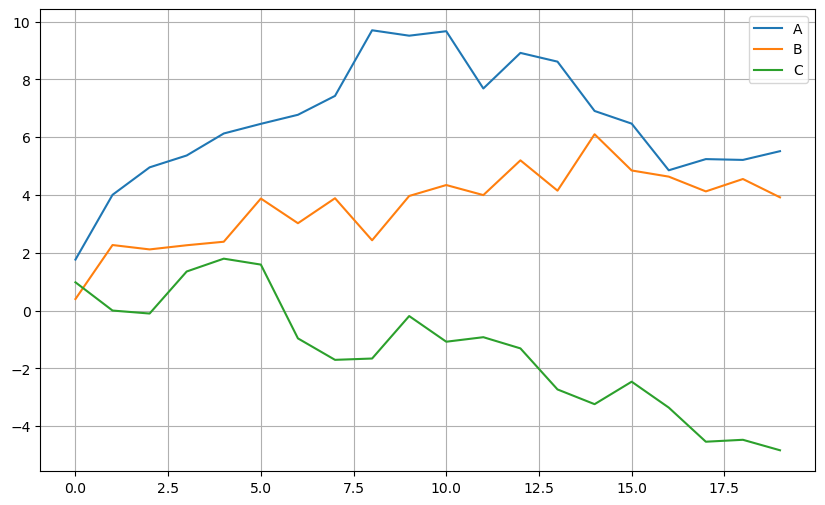

In [8]:
df.cumsum().plot(grid=True, figsize=(10, 6))

Changing colors.

<AxesSubplot:>

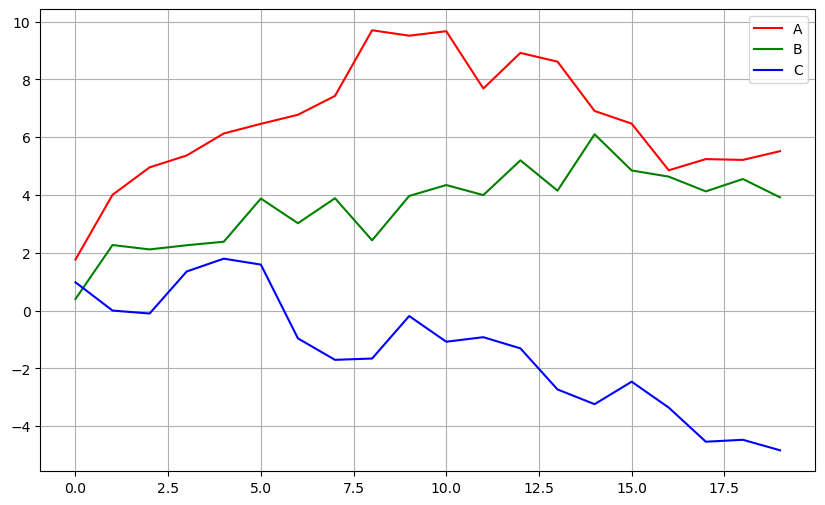

In [9]:
df.cumsum().plot(grid=True, figsize=(10, 6), color=['r', 'g', 'b'])

The plot type can be varied with the `kind` parameter. This corresponds roughly to the matplotlib plot types.

<AxesSubplot:>

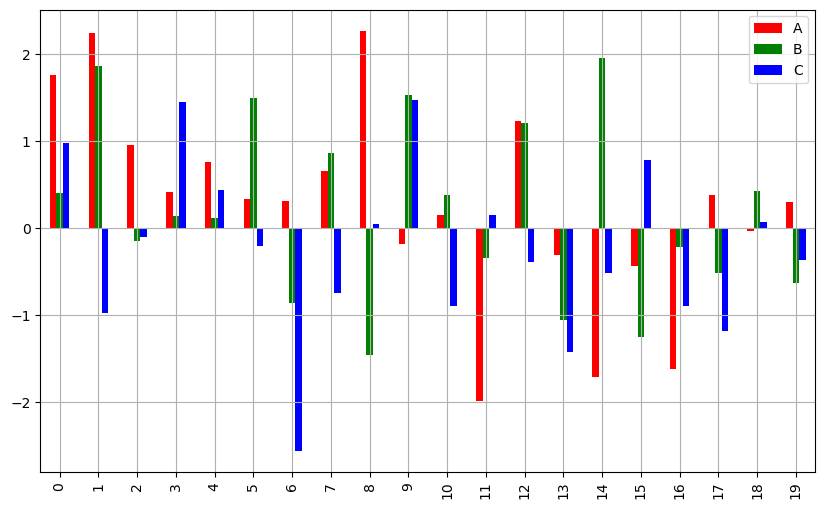

In [10]:
df.plot(kind="bar", grid=True, figsize=(10, 6), color=['r', 'g', 'b'])

<AxesSubplot:>

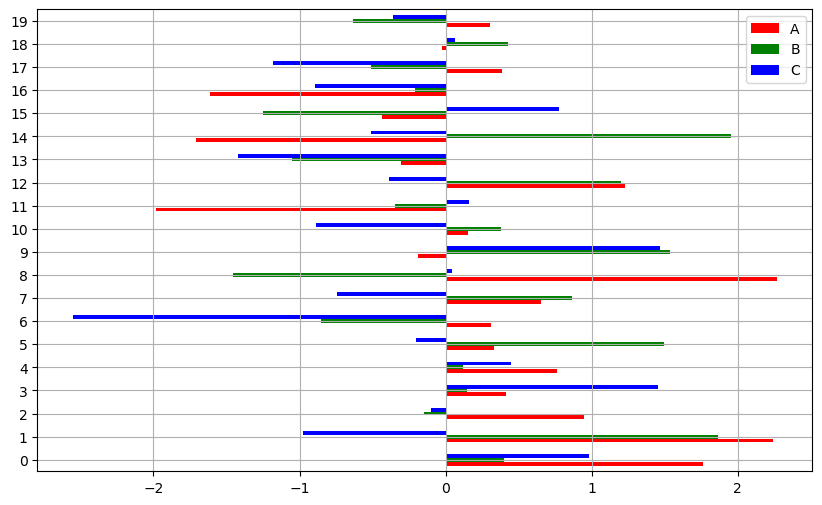

In [11]:
df.plot(kind="barh", grid=True, figsize=(10, 6), color=['r', 'g', 'b'])

<AxesSubplot:ylabel='Frequency'>

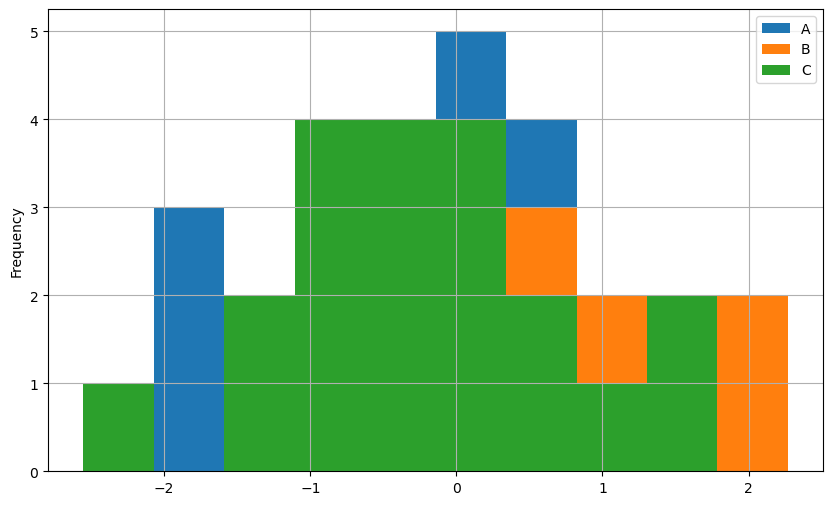

In [12]:
df.plot(kind="hist", grid=True, figsize=(10, 6))

<AxesSubplot:ylabel='Density'>

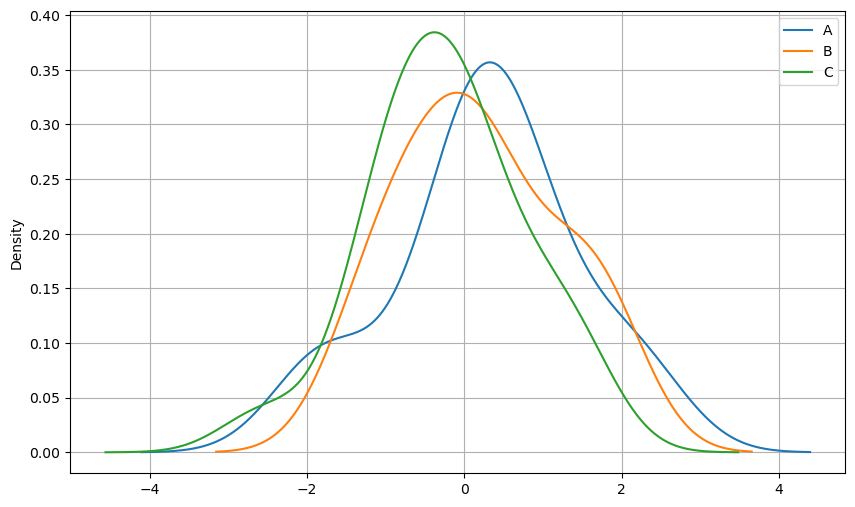

In [13]:
df.plot(kind="kde", grid=True, figsize=(10, 6))

<AxesSubplot:>

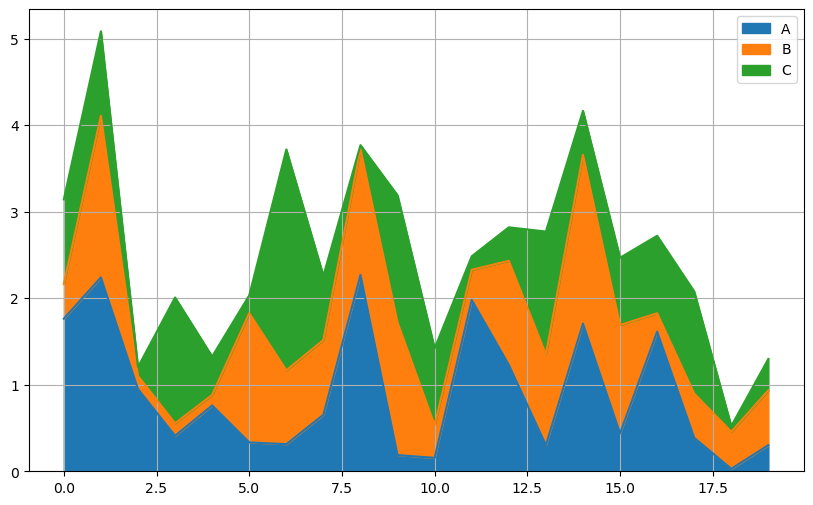

In [14]:
df.abs().plot(kind="area", grid=True, figsize=(10, 6)) # df.abs, since stacked plot requires non-negative values.

array([<AxesSubplot:ylabel='A'>, <AxesSubplot:ylabel='B'>,
       <AxesSubplot:ylabel='C'>], dtype=object)

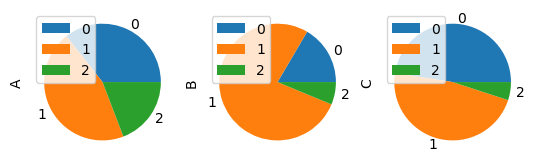

In [15]:
df.abs()[:3].plot(kind="pie", subplots=True)

<AxesSubplot:xlabel='A', ylabel='B'>

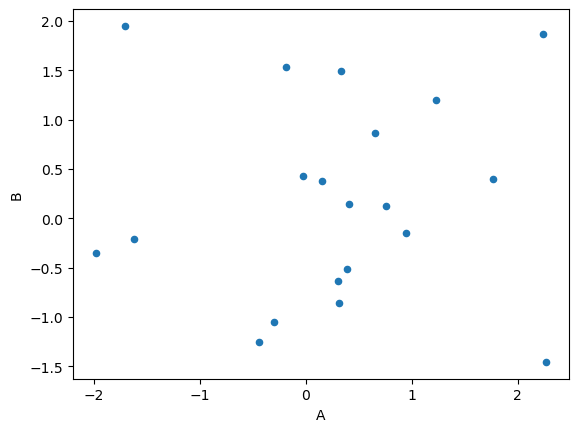

In [16]:
df.plot(kind="scatter", x="A", y="B")

## Population data

In [17]:
df = pd.read_csv("data/population.csv")

In [18]:
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92490932.000
1,Arab World,ARB,1961,95044497.000
2,Arab World,ARB,1962,97682294.000
3,Arab World,ARB,1963,100411076.000
4,Arab World,ARB,1964,103239902.000


<AxesSubplot:xlabel='Year'>

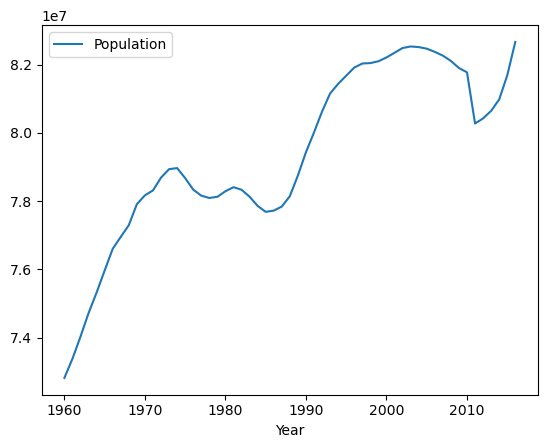

In [19]:
df[df["Country Name"] == "Germany"].plot(kind="line", x="Year", y="Value", label="Population")

The resulting object is a matplotlib Axes object and can be adjusted further.

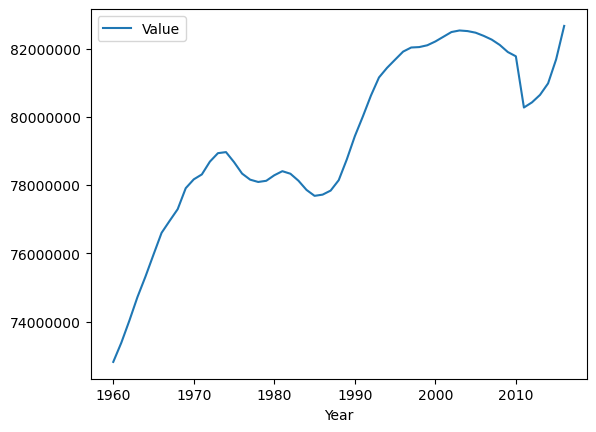

In [20]:
ax = df[df["Country Name"] == "Germany"].plot(kind="line", x="Year", y="Value")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

To compare countries side by side, we want to create a data frame, where each column represents a country. 
We can use `pivot_table` for this. We use the Year entries as index and the Country Name as columns.

In [21]:
df[df["Country Name"].isin(["Germany", "France"])].pivot_table(
    index="Year", columns="Country Name").head(10)

/tmp/ipykernel_387330/3952633378.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df[df["Country Name"].isin(["Germany", "France"])].pivot_table(


Value             
Country Name       France      Germany
Year                                  
1960         46814237.000 72814900.000
1961         47444751.000 73377632.000
1962         48119649.000 74025784.000
1963         48803680.000 74714353.000
1964         49449403.000 75318337.000
1965         50023774.000 75963695.000
1966         50508717.000 76600311.000
1967         50915456.000 76951336.000
1968         51276054.000 77294314.000
1969         51638260.000 77909682.000

In [22]:
cmp = df[df["Country Name"].isin(["Germany", "France"])].pivot_table(
    index="Year", columns="Country Name")

/tmp/ipykernel_387330/2869843154.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  cmp = df[df["Country Name"].isin(["Germany", "France"])].pivot_table(


We get back a hierarchical index, which in this case we do not need. We set the columns to the country names, which are on the second level.

In [23]:
cmp.columns = cmp.columns.get_level_values(1)

Now, plotting countries side-by-side is easy.

<AxesSubplot:xlabel='Year'>

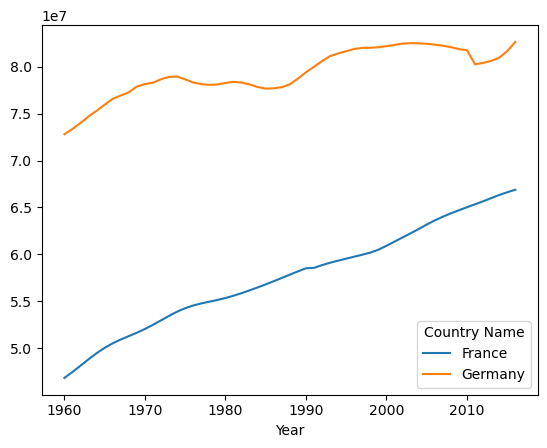

In [24]:
cmp.plot(legend=True)

Plotting countries side by side.

Filters can be used before plotting. Here, we filter by year and plot a horizontal bar chart. We only take a subset of rows. The plot function can take further customizations, such as the figure size.

<AxesSubplot:ylabel='Country Name'>

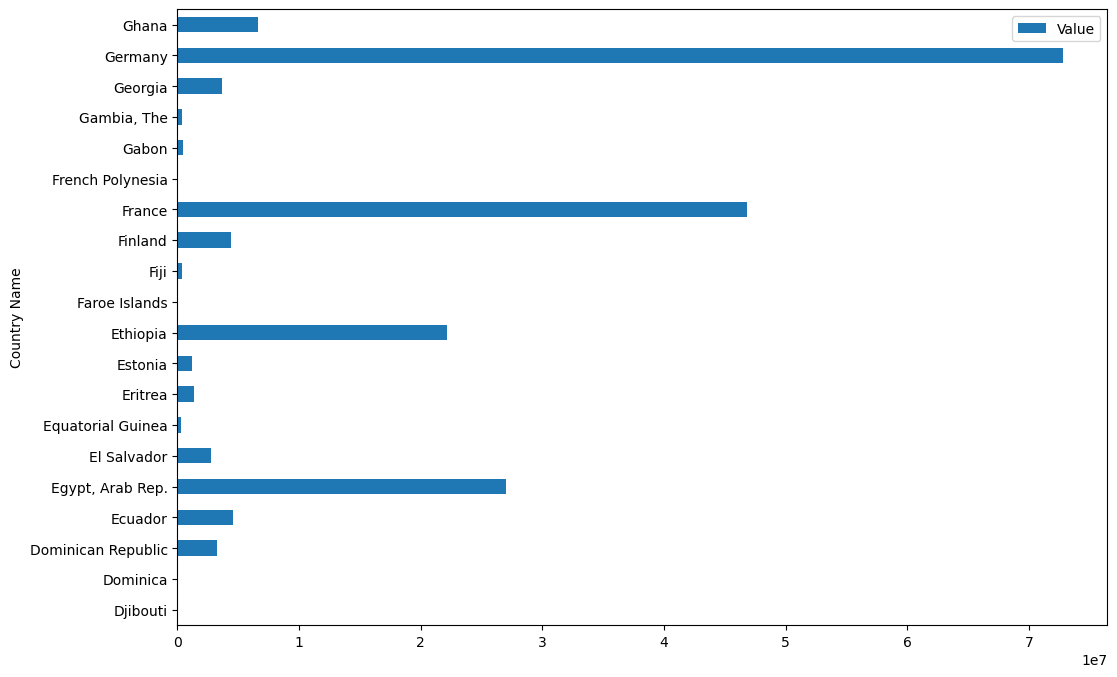

In [25]:
df[df["Year"] == 1960][100:120].plot(kind="barh", x="Country Name", y="Value", figsize=(12, 8))

We can also sort the data, before it is plotted. We also add a label for the legend.

<AxesSubplot:ylabel='Country Name'>

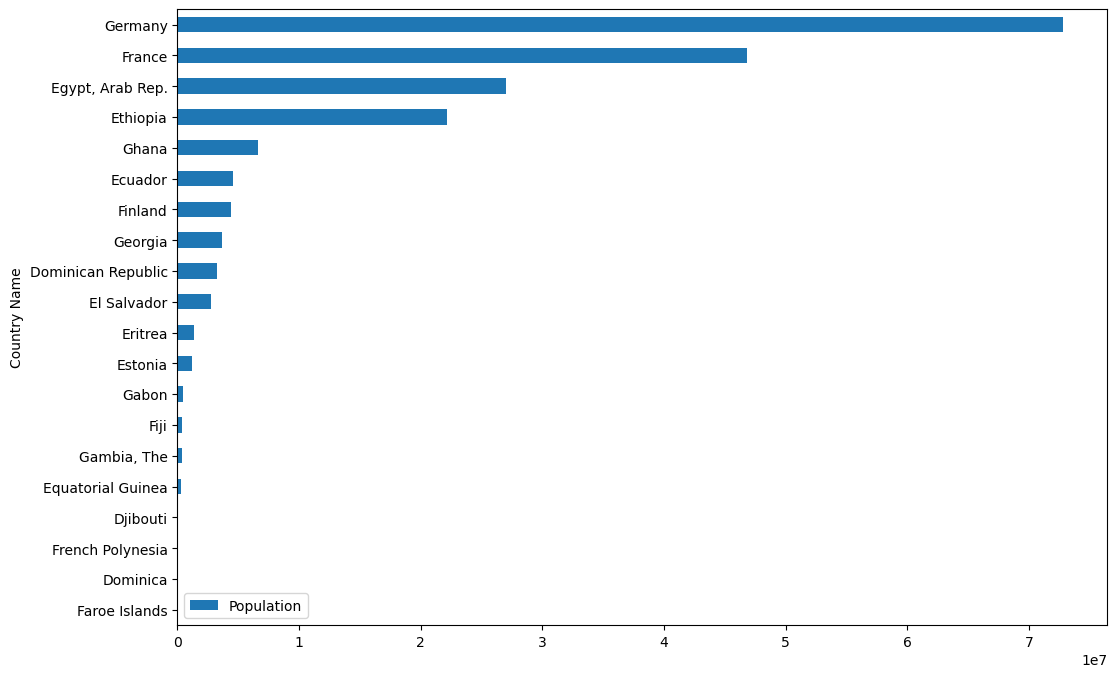

In [26]:
df[df["Year"] == 1960][100:120].sort_values(by="Value").plot(
    kind="barh", x="Country Name", y="Value", figsize=(12, 8), label="Population")